## Домашнее задание по теме "работа с переменными"

In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [56]:
data = pd.read_csv(load_boston()["filename"], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [57]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Явных пропусков нет, обрабатывать пропуски не будем

In [59]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM, ZN, DIS и LSTAT - большие максимум, может быть выброс. Проверим

Сначала обучим модель на текущих данных, посмотрим какой результат и сможем ли мы улучшить

In [60]:
x = data.drop(['MEDV'], axis=1)
y = data['MEDV']
reg = LinearRegression().fit(x, y)
print(f'Weihts: {reg.coef_}')
print(f'Bais: {reg.intercept_}')
print(f'Error: {mean_absolute_error(reg.predict(x), y)}')

Weihts: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bais: 36.459488385090005
Error: 3.270862810900314


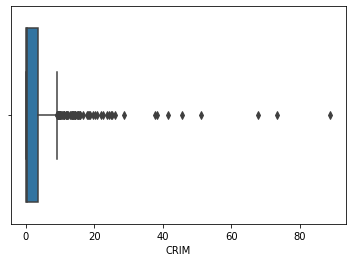

In [61]:
sns.boxplot(data['CRIM'])

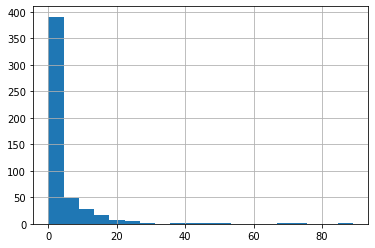

In [62]:
data['CRIM'].hist(bins=20)

В основном уровень криминала колеблится от 0 до 30. Попробую откинуть значения больше 60, буду считать их выбросами и аномальными всплесками. Тем более криминал нельзя считать постоянным показателем, он может меняться в зависимости от смены руководителей полиции, законов и т.п.

In [74]:
# скопируем измененный датасет в новый
data_new = data

In [77]:
# откинем данные больше 60, а пропуски заменим 50м перцентилем
data_new['CRIM'] = data_new['CRIM'].apply(lambda x: x if x <= 60 else 0.256510)

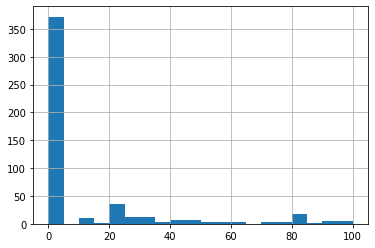

In [76]:
# Посмотрим на следующий подозрительный для выбросов столбец
data['ZN'].hist(bins=20)

Я не увидела ничего лишнего, на выбросы непохоже, оставляем

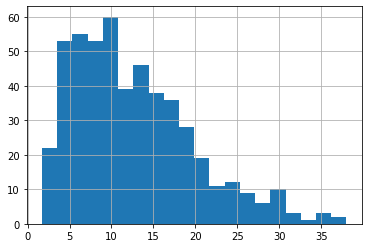

In [78]:
data['LSTAT'].hist(bins=20)

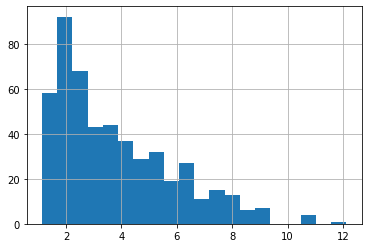

In [79]:
data['DIS'].hist(bins=20)

Большие максимумы у LSTAT и DIS с виду не похожи на выбросы, их тоже оставляем.

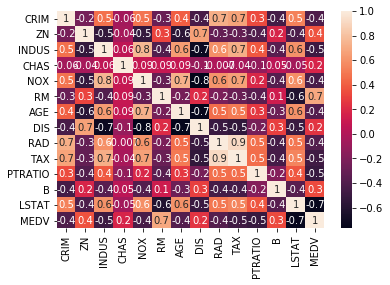

In [86]:
# Посмотрим на корреляцию
sns.heatmap(data.corr(), annot = True, fmt='.01g')

Коррелируют TAX (налог) и RAD (доступность магистралей), DIS (расстояние до центров) и NOX (концентрация азота), INDUS (доля земли без розничной торговли) и NOX (концентрация азота).
Попробуем отбросить данные по наиболее скоррелированным, а именно уберем из модели TAX

In [88]:
data_new = data_new.drop('TAX', axis=1)

Обучаем модель на новых данных

In [89]:
x = data_new.drop(['MEDV'], axis=1)
y = data_new['MEDV']
reg = LinearRegression().fit(x, y)
print(f'Weihts: {reg.coef_}')
print(f'Bais: {reg.intercept_}')
print(f'Error: {mean_absolute_error(reg.predict(x), y)}')

Weihts: [-2.91267279e-02  3.34435416e-02 -6.13576528e-02  3.14292409e+00
 -1.81315643e+01  3.92362345e+00 -7.51232693e-04 -1.42956145e+00
  9.22246921e-02 -9.79593756e-01  1.03082891e-02 -5.41776497e-01]
Bais: 33.96310721851658
Error: 3.336664003995036


### В итоге: по сути ничего не поменялось